<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/3a_2-Car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform visualization and Decision Tree classification of the Car Evaluation data set, as described in Assignment 3, Project Task 1

https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

In [32]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # Import Decision Tree Classifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split function 
#from sklearn import cross_validation, metrics
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
#from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report #Import scikit-learn metrics module to calculate accuracy

import warnings
warnings.filterwarnings('ignore')

In [96]:
# store as DataFrame
df = pd.read_csv ('CarDataM.csv')
df = df.dropna() #Remove NAs (just in case, there are non NaN's on this DB)
df.head()

,Buying,Maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Perform data visualization with bar plots, for the various values of the class label.

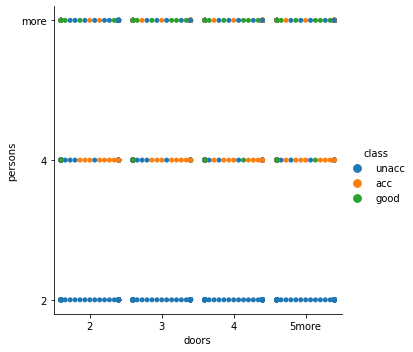

In [93]:
sns.catplot(x="doors", y="persons", hue="class", kind="swarm", data=df)

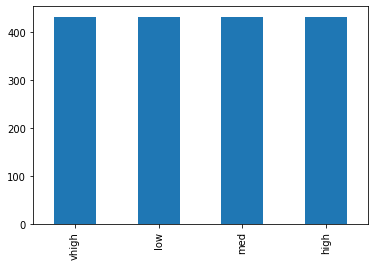

In [97]:
df['Buying'].value_counts().plot(kind='bar')

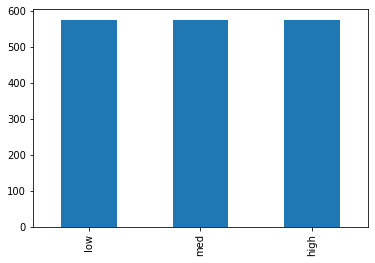

In [99]:
df['safety'].value_counts().plot(kind='bar')

In [45]:
df.describe()

,Buying,Maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,3
top,vhigh,vhigh,4,more,big,low,unacc
freq,432,432,432,576,576,576,1210


In [46]:
#Plot both scatter Plots and histohram with "pairplot"

### Split the data into train-test set in 70-30 ratio. Train the classifier with the train data set.

### Classification with Entropy

Decision trees like most machine learning algorithms cannot process labeled data values hence the data needs to be encoded as numerical data.

In [47]:
#First, find out all the features with type object in the test data:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Buying', 'Maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


Since the target class labels are strings, we'll have to convert in a format that our classifier would understand. For this we would use the LabelEncoder class of Scikit-Learn module 'preprocessing'. This converts our class labels into [1,2,3,4] where the integers would correspond to the respective class.

In [48]:
#Convert car-class labels to numbers - Not needed - 
#le = preprocessing.LabelEncoder()
#df['class'] = le.fit_transform(df['class'])    
#df.head()         

In [49]:
df['class'].unique()

array(['unacc', 'acc', 'good'], dtype=object)

In [50]:
features = list(df.columns)
features.remove('class')

for f in features:
    #Get binarized columns
    df[f] = pd.get_dummies(df[f])

df.head()    

,Buying,Maint,doors,persons,lug_boot,safety,class
0,0,0,1,1,0,0,unacc
1,0,0,1,1,0,0,unacc
2,0,0,1,1,0,1,unacc
3,0,0,1,1,0,0,unacc
4,0,0,1,1,0,0,unacc


In [51]:
# splitting the dataset into features and target variable
feature_cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
X = df.drop(['class'], axis=1) # feature matrix [1]
y = df['class'] # target variable 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [53]:
X_train.head()

,Buying,Maint,doors,persons,lug_boot,safety
1611,0,0,0,0,0,0
1415,0,1,1,0,0,1
828,1,0,0,0,0,0
764,1,0,1,1,1,1
1624,0,0,1,1,0,0


In [57]:
!pip install --upgrade category_encoders
import category_encoders as ce

     |████████████████████████████████| 82 kB 440 kB/s 


Encode the rest of the variables

In [59]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Buying', 'Maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [60]:
X_train.head()

,Buying,Maint,doors,persons,lug_boot,safety
1611,1,1,1,1,1,1
1415,1,2,2,1,1,2
828,2,1,1,1,1,1
764,2,1,2,2,2,2
1624,1,1,2,2,1,1


In [68]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [69]:
#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7803


In [70]:
#Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['unacc', 'acc', 'unacc', ..., 'unacc', 'acc', 'unacc'],
      dtype=object)

In [71]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7643


In [72]:
#Check for overfitting and underfitting


# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7643
Test set score: 0.7803


[Text(418.5, 380.52, 'X[3] <= 1.5\nentropy = 1.117\nsamples = 1209\nvalue = [268, 90, 851]'),
 Text(334.8, 271.8, 'X[5] <= 1.5\nentropy = 1.352\nsamples = 807\nvalue = [268, 90, 449]'),
 Text(167.4, 163.07999999999998, 'X[4] <= 1.5\nentropy = 1.057\nsamples = 544\nvalue = [132, 26, 386]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.884\nsamples = 351\nvalue = [70, 9, 272]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 1.284\nsamples = 193\nvalue = [62, 17, 114]'),
 Text(502.20000000000005, 163.07999999999998, 'X[0] <= 1.5\nentropy = 1.482\nsamples = 263\nvalue = [136, 64, 63]'),
 Text(418.5, 54.360000000000014, 'entropy = 1.527\nsamples = 195\nvalue = [88, 64, 43]'),
 Text(585.9, 54.360000000000014, 'entropy = 0.874\nsamples = 68\nvalue = [48, 0, 20]'),
 Text(502.20000000000005, 271.8, 'entropy = 0.0\nsamples = 402\nvalue = [0, 0, 402]')]

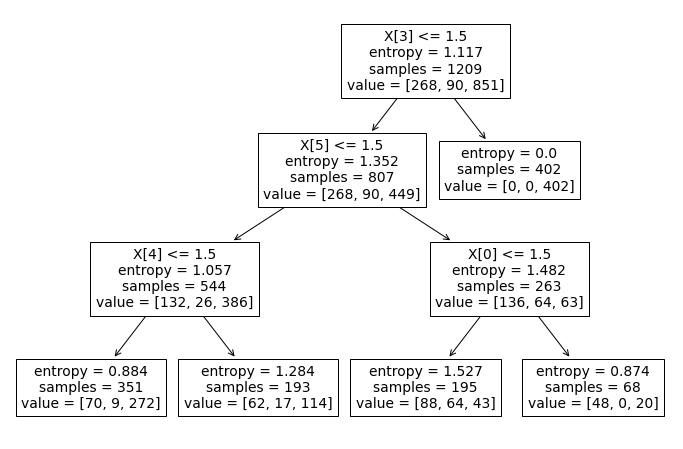

In [73]:
#Visualize the desicion tree
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

### Classification with Gini Index

Model accuracy score with criterion gini index: 0.8021


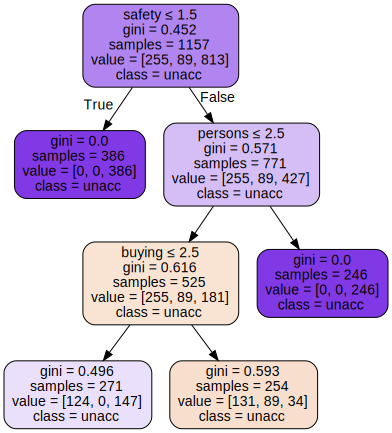

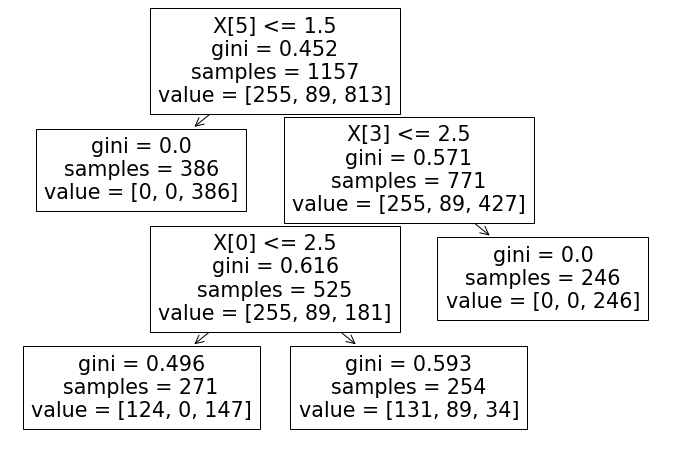

In [84]:

df = pd.read_csv ('CarDataM.csv') # read_csv is a pandas function utilized to read csv files and do operations on it 

# renaming column names
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"] 
df.columns = col_names # assigning the above column names to the dataframe’s current columns

df.shape # viewing dataset’s dimension
df.head(5) # previewing the first 5 rows of the dataset

# splitting the dataset into features and target variable
feature_cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
X = df.drop(['class'], axis=1) # feature matrix [1]
y = df['class'] # target variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # 67% training and 33% test // found out by 1 - test_size = 1 - 0.33 = 0.67 -> 67%
X_train.shape, X_test.shape

# decision trees like most machine learning algorithms cannot process labeled data values hence the data is encoded as numerical data is easily handled by this algorithm. A stackoverflow question expands on this topic.

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

X_test.head()

# Create Decision Tree classifier object ; clf refers to classifier
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0) 
clf_gini.fit(X_train, y_train) 
y_pred_gini = clf_gini.predict(X_test) 

# determining model accuracy i.e. how often is the classifier correct?
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

import graphviz # graphviz takes description of graphs and data and constructs diagrams based off of that information
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph 
